In [2]:
import pandas as pd

In [3]:
data = pd.read_csv(r'yield_data.csv/yield_data.csv')

In [4]:
data.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [9]:
data = data.iloc[:,1:]

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [13]:
data.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [14]:
data.columns

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')

In [15]:
target = data['hg/ha_yield']

In [17]:

# Handle missing values (if any)
data.fillna(method='ffill', inplace=True)  # Forward fill to handle any missing values

# Convert data types if necessary (all seem appropriate here)
# data['Year'] = pd.to_datetime(data['Year'], format='%Y')

# Remove duplicates if any
data.drop_duplicates(inplace=True)

# Normalize/standardize the numerical columns if necessary
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']] = scaler.fit_transform(
    data[['hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']]
)


C:\Users\Spandana\AppData\Local\Temp\ipykernel_5008\2955257460.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill to handle any missing values


In [18]:
data

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,-0.476870,0.471388,-0.605681,-0.629302
1,Albania,Potatoes,1990,-0.121815,0.471388,-0.605681,-0.629302
2,Albania,"Rice, paddy",1990,-0.633759,0.471388,-0.605681,-0.629302
3,Albania,Sorghum,1990,-0.761739,0.471388,-0.605681,-0.629302
4,Albania,Soybeans,1990,-0.826715,0.471388,-0.605681,-0.629302
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,-0.642643,-0.682816,-0.563235,-0.102845
28238,Zimbabwe,Sorghum,2013,-0.873191,-0.682816,-0.563235,-0.102845
28239,Zimbabwe,Soybeans,2013,-0.754154,-0.682816,-0.563235,-0.102845
28240,Zimbabwe,Sweet potatoes,2013,-0.646884,-0.682816,-0.563235,-0.102845


In [23]:
data = pd.DataFrame(data)

<Axes: >

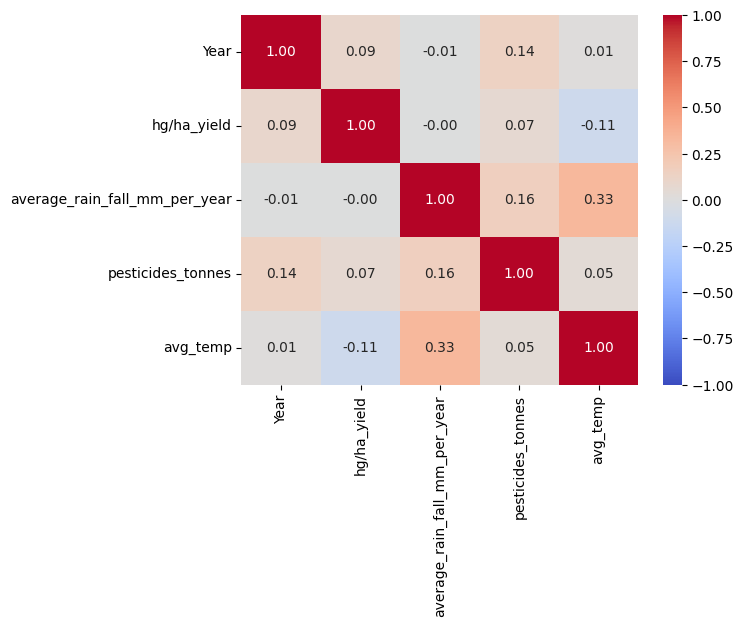

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = data.iloc[:,2:].corr( )
sns.heatmap(corr,annot=True, cmap='coolwarm', fmt=".2f",vmin=-1)